# Data exploration
This notebook is dedicated to the exploration of the dataset we built. We will treat each feature separately, try to understand its distribution and find interesting patterns without looking at the target variable.

The goal is to ensure that the data is clean and ready for the modeling phase and to get a better understanding of it.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


data = pd.read_csv('data/data_spread_rate.csv')

## Plotting positions on the map
We can start by plotting the positions of the countries on a map.

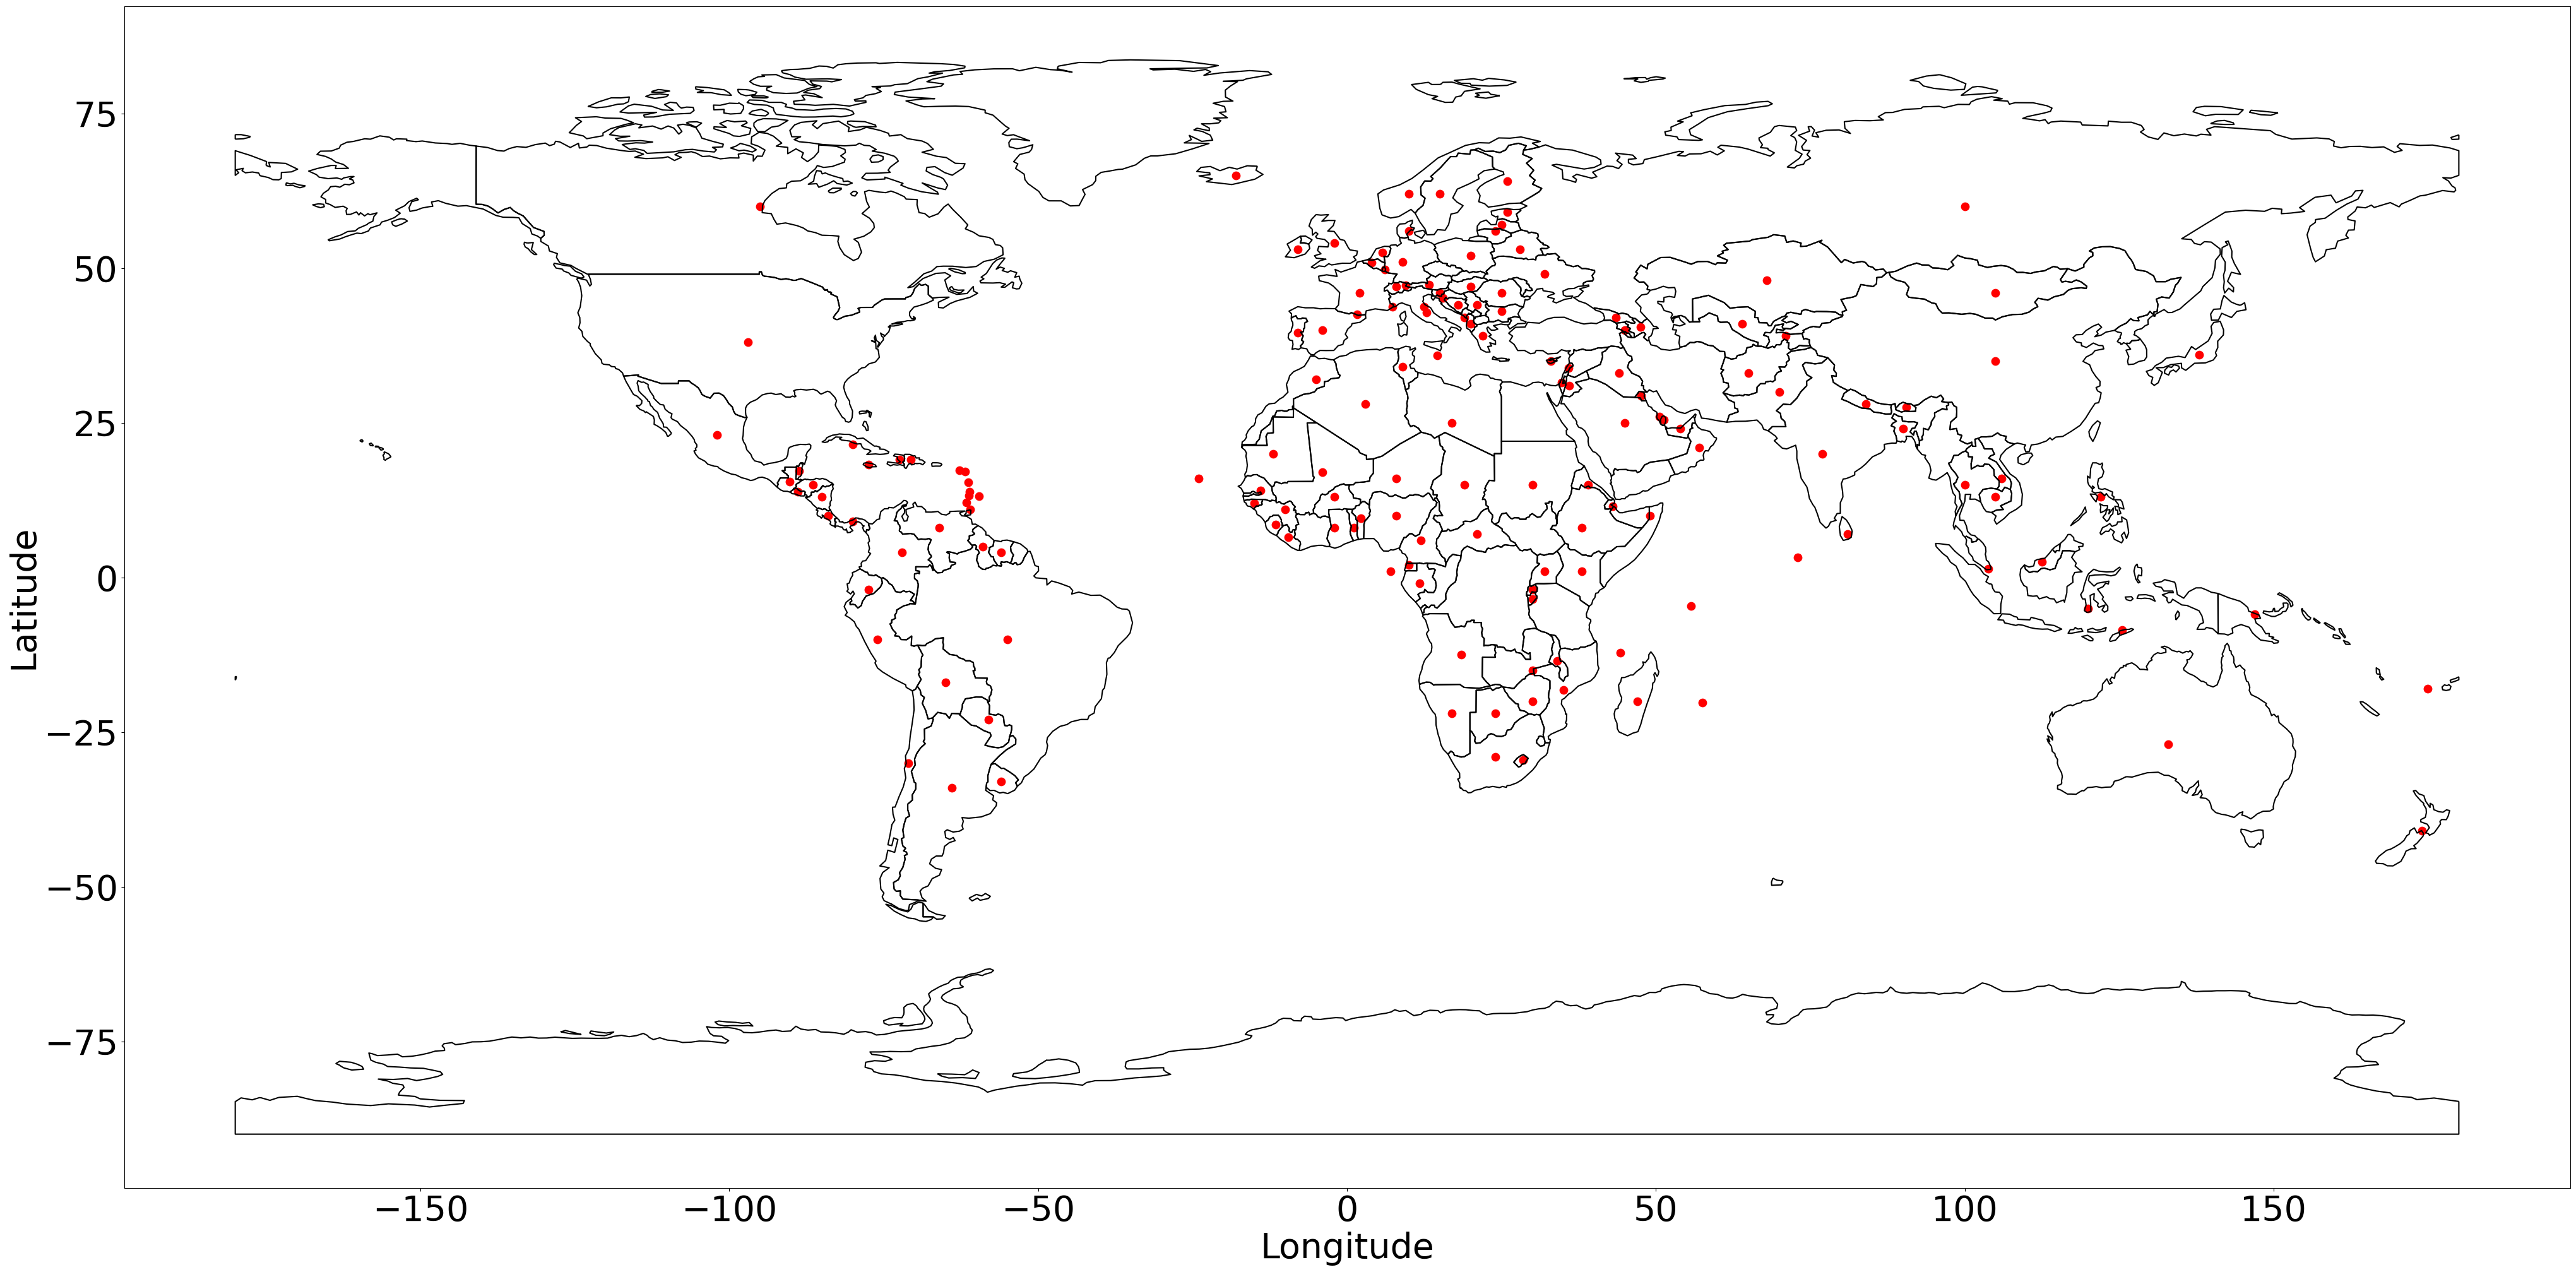

In [3]:
import geopandas as gpd


lat = data['Latitude']
lon = data['Longitude']
contries = data['Country']

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

plt.rcParams.update({'font.size': 40})
fig, ax = plt.subplots(figsize=(50, 50))
world.boundary.plot(ax=ax, edgecolor='black')
ax.scatter(lon, lat, color='red', s=80)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# for i, txt in enumerate(contries):
#     ax.annotate(txt, (lon[i], lat[i]))
    
plt.show()

Some countries might seem in the middle of the ocean, but they are actual territories that doesn't appear on the map because of the resolution.

Also, some countries doesn't appear because some of the datasets we used didn't have data for them.

Other than that, everything seems fine.

## Urbanization

We can start by a basic sanity check to ensure that the urbanization rate is between 0 and 100 for all countries.

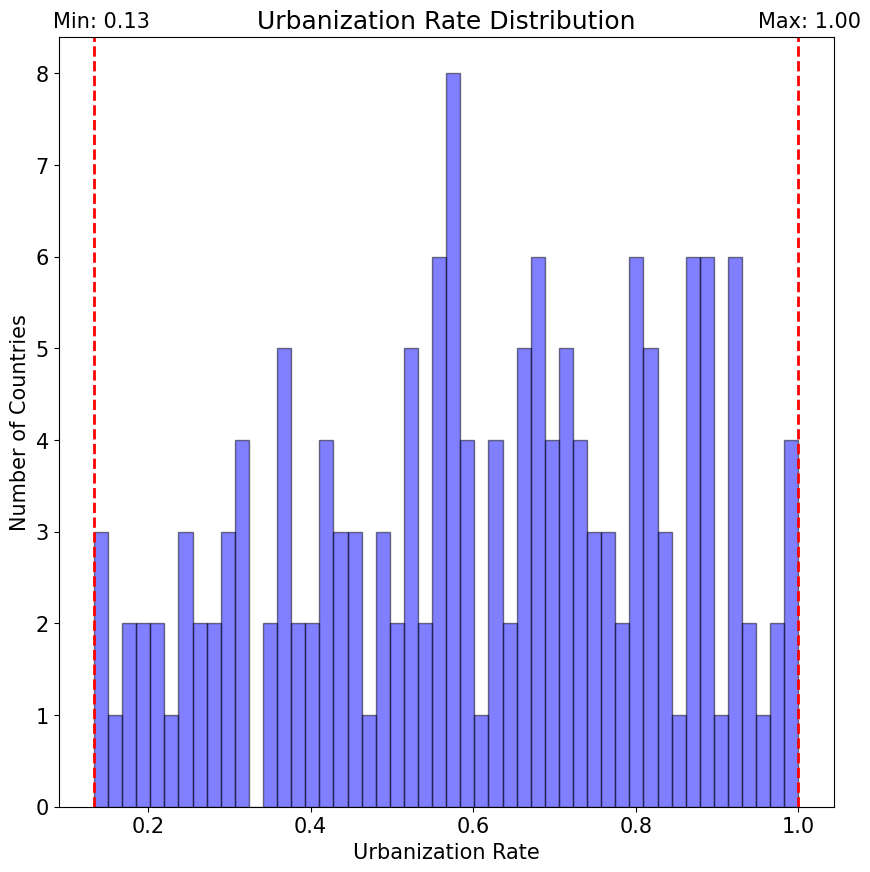

In [10]:
urban = data['Urban Population']
total = data['Total Population']
urban_rate = urban / total

fig, ax = plt.subplots(figsize=(10, 10))
urban_rate.plot.hist(ax=ax, bins=50, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Urbanization Rate')
plt.ylabel('Number of Countries')
plt.title('Urbanization Rate Distribution')

min_value = urban_rate.min()
max_value = urban_rate.max()
plt.axvline(min_value, color='red', linestyle='dashed', linewidth=2)
plt.axvline(max_value, color='red', linestyle='dashed', linewidth=2)
plt.text(min_value - 0.05, 8.5, f'Min: {min_value:.2f}')
plt.text(max_value - 0.05, 8.5, f'Max: {max_value:.2f}')
plt.show()

All the values are within the expected range.

In [14]:
countries = data['Country']

full = [i for i,u in enumerate(urban_rate) if u == 1]

print('Countries with urbanization rate of 1:')
print(*countries[full], sep='\n')

Countries with urbanization rate of 1:
Kuwait
Monaco
Singapore


We also see that the countries that have an urbanization rate of 1 are mostly city-states like Monaco and Singapore which makes sense.

## Mean temperature
We can also plot the mean temperature of each country to see if there are any outliers.

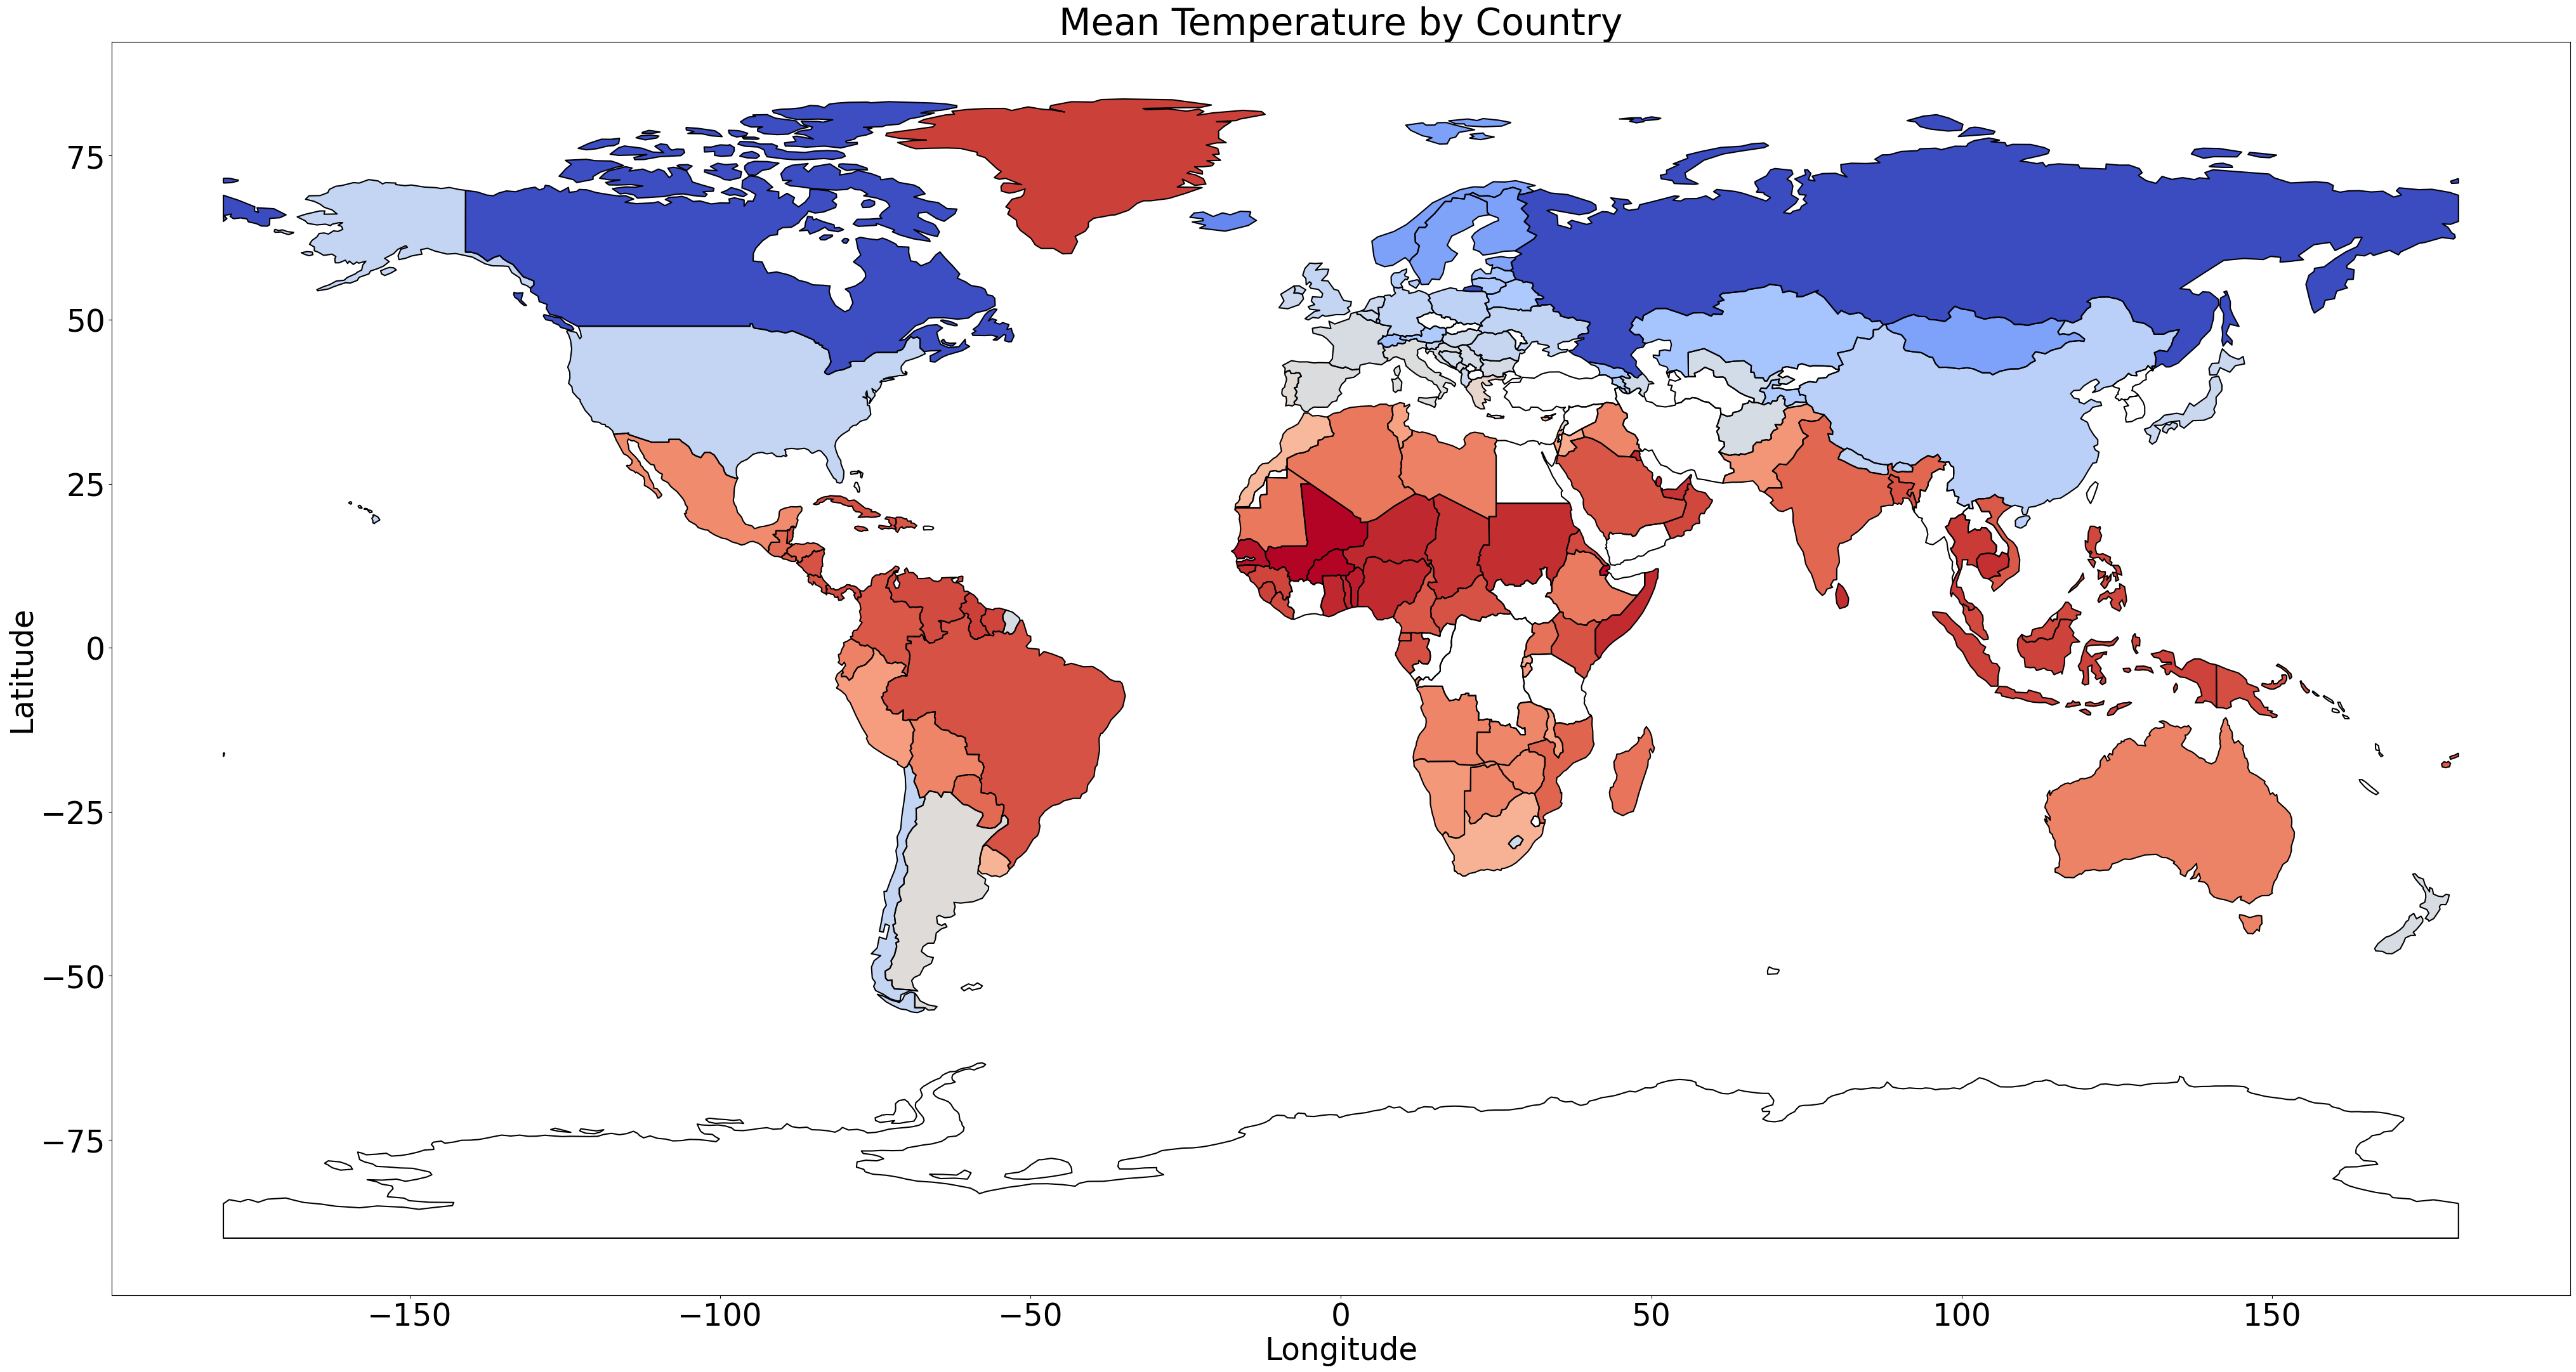

In [57]:
import geopandas as gpd
import difflib


mean_temp = data['Mean temperature']
countries = data['Country']

# Get countries names for the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map_names = world['name']

# Find the closest match for each country
matches = [difflib.get_close_matches(c, map_names, n=1, cutoff=0.5) for c in countries]
matches = [m[0] if m else None for m in matches]

# Add the matches to the data
data['Map Name'] = matches
data = data.dropna()

# Plot the world map
fig, ax = plt.subplots(figsize=(50, 50))
world.boundary.plot(ax=ax, edgecolor='black')

# Fill the countries that are in data with a color that depends on the mean temperature
for i, row in data.iterrows():
    name = row['Map Name']
    temp = row['Mean temperature']
    color = plt.cm.coolwarm((temp - mean_temp.min()) / (mean_temp.max() - mean_temp.min()))
    world[world['name'] == name].plot(ax=ax, color=color)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Temperature by Country')
plt.show()




Results are convincing, with temperatures being the highest near the equator and the lowest near the poles.

Also temperatures of countries of the same region are similar.

White spots are countries that are not in the dataset (or that have a name in our dataset that differs to much from the one in the geopandas dataset).

## Spread rate vs. mortality rate
We can also compare our spread rate and the mortality rate that was used in the previous study.

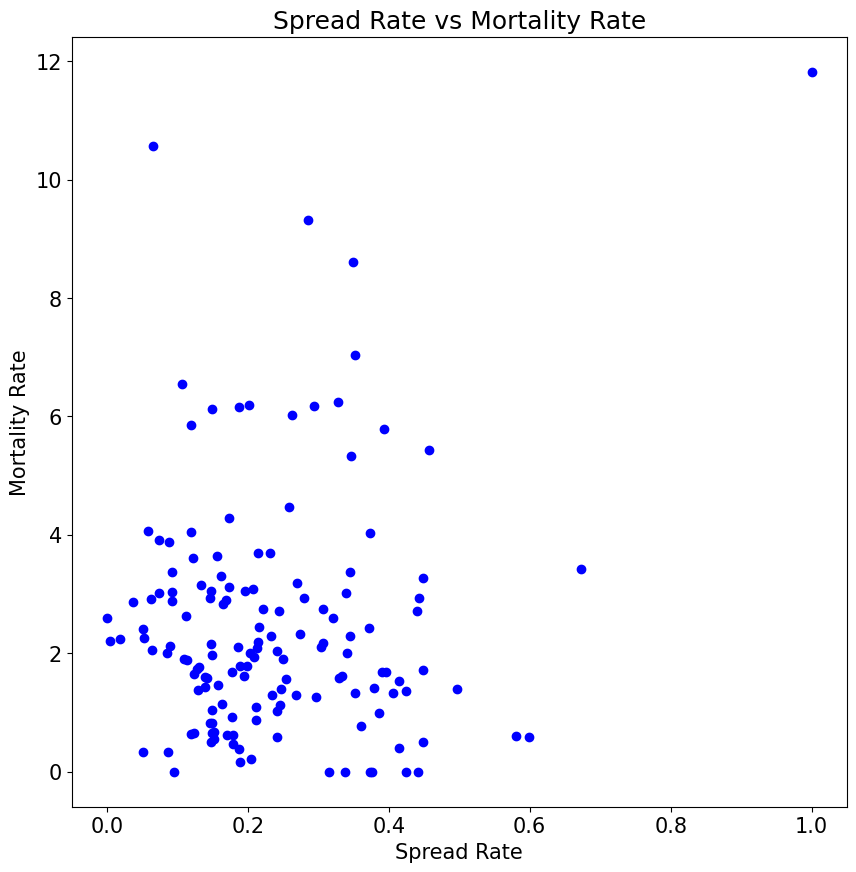

In [61]:
spread_rate = data['Spread rate']
mortality_rate = data['Mortality Rate']

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(spread_rate, mortality_rate, color='blue')
plt.xlabel('Spread Rate')
plt.ylabel('Mortality Rate')
plt.title('Spread Rate vs Mortality Rate')

plt.show()

By plotting the two variables, we can see that the points aren't on a straight line at all.

In [62]:
correlation = spread_rate.corr(mortality_rate)
print(f'Correlation between spread rate and mortality rate: {correlation:.2f}')

Correlation between spread rate and mortality rate: 0.12


As we could have expected after seeing the plot above, the correlation between the two variables is close to 0.